In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/Machine learning /FinalProject/
df = pd.read_csv("CC GENERAL.csv")

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/Machine learning /FinalProject


In [54]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [55]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,0
CUST_ID,False
BALANCE,False
BALANCE_FREQUENCY,False
PURCHASES,False
ONEOFF_PURCHASES,False
INSTALLMENTS_PURCHASES,False
CASH_ADVANCE,False
PURCHASES_FREQUENCY,False
ONEOFF_PURCHASES_FREQUENCY,False
PURCHASES_INSTALLMENTS_FREQUENCY,False


In [63]:
# @title Using K-Nearest neighbors to predict missng values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def impute_missing_values(df_in, n_neighbors=5):
  # Assuming df is your original DataFrame with missing values
  df = df_in.copy()
  # 1. Select numeric columns
  numeric_cols = df.select_dtypes(include = ['number']).columns
  numeric_df = df[numeric_cols]

  # 2. Initial imputation for scaling (using mean)
    # We need this because StandardScaler can't handle missing values
  initial_imputer = SimpleImputer(strategy='mean')
  data_for_scaling = initial_imputer.fit_transform(numeric_df)

  # 3. Scale features
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data_for_scaling)

  # 4. Create imputer
  imputer = KNNImputer(
      n_neighbors=5,
      weights='distance',
      metric='nan_euclidean'
  )

  # 5. Perform imputation
  imputed_data = imputer.fit_transform(scaled_data)

  # 6. Inverse scaling
  final_imputed = scaler.inverse_transform(imputed_data)

  # 7. Create DataFrame with imputed values
  df_imputed = pd.DataFrame(final_imputed, columns=numeric_cols, index=df.index)

  # 8. Merge back with original data
  df = df.drop(columns=numeric_cols).join(df_imputed)
  return df

imputed_df = impute_missing_values(df)
imputed_df
#imputed_df.isnull().any()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,1.666670e-01,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,-5.551115e-17,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,8.333300e-02,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,8.333300e-02,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000e+00,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000e+00,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.206542,0.000000,6.0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,8.333330e-01,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,-5.551115e-17,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


In [64]:
# imputed_df.isnull().any()

In [65]:
imputed_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,4.903505e-01,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,4.013707e-01,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.551115e-17,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281916,0.888889,39.635000,0.000000,0.000000,0.000000,8.333300e-02,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,5.000000e-01,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,9.166670e-01,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000e+00,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


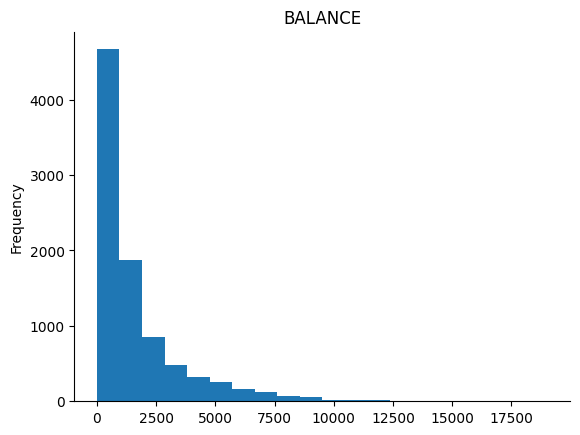

In [66]:
# @title BALANCE (here we can se that most of people have not money))

from matplotlib import pyplot as plt
imputed_df['BALANCE'].plot(kind='hist', bins=20, title='BALANCE')
plt.gca().spines[['top', 'right',]].set_visible(False)

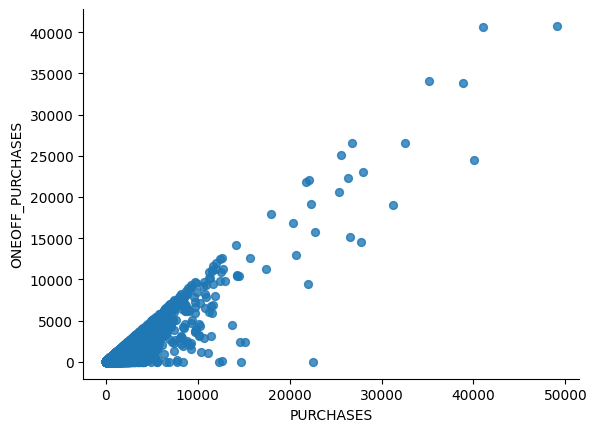

In [67]:
# @title PURCHASES vs ONEOFF_PURCHASES

from matplotlib import pyplot as plt
imputed_df.plot(kind='scatter', x='PURCHASES', y='ONEOFF_PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

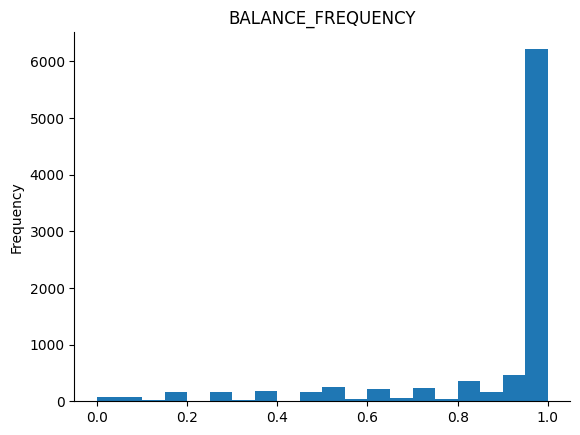

In [68]:
# @title BALANCE_FREQUENCY(here we can see that most of peope balances were updated  frequently)

from matplotlib import pyplot as plt
imputed_df['BALANCE_FREQUENCY'].plot(kind='hist', bins=20, title='BALANCE_FREQUENCY')
plt.gca().spines[['top', 'right',]].set_visible(False)

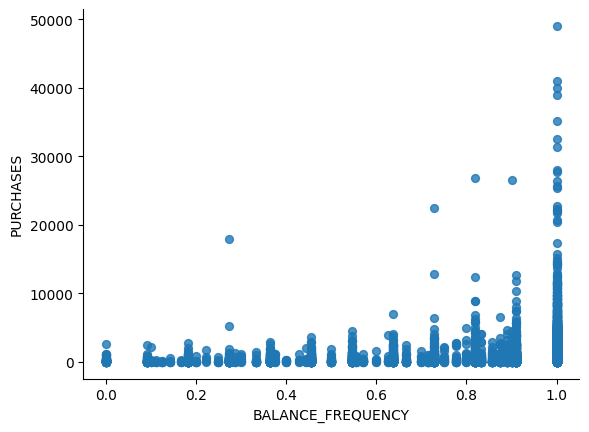

In [69]:
# @title BALANCE_FREQUENCY vs PURCHASES(here we can se some relationship.How big is Frequency then big amount of purchases is more possible)

from matplotlib import pyplot as plt
imputed_df.plot(kind='scatter', x='BALANCE_FREQUENCY', y='PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [70]:
import numpy as np

###now find indexes of outliers
def delete_outliers(df,percentile = 0.2):
  """df:Pandas DataFrame
     percentile:float value from 0 to 1 which shows min percentage of variables in observation which can be considered as outlier
  return:Pandas DataFrame without outliers
  """
  new_df = df.copy()
  def indicies_of_outliers(x):
    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(x):
        return np.where([False]) # Return an empty array of indices

    q1,q2, q3 = np.percentile(x.dropna(), [25,50, 75]) # Drop NaN values before calculating percentiles
    iqr = q3-q1
    lower_bound_condition = x > q2 - 1.5*iqr
    upper_bound_condition = x < q2 + 1.5*iqr

    # Handle empty sequences for lower bound
    if x[lower_bound_condition].empty:
        lower_bound = x.min() # Use the minimum of the entire column if no values are above the calculated lower bound
    else:
        lower_bound = min(x[lower_bound_condition])

    # Handle empty sequences for upper bound
    if x[upper_bound_condition].empty:
        upper_bound = x.max() # Use the maximum of the entire column if no values are below the calculated upper bound
    else:
        upper_bound = max(x[upper_bound_condition])

    return np.where((x > upper_bound) | (x < lower_bound))

  new_df = df.copy()
  indices_to_drop = np.array([])
  for var in new_df.columns:
    indices = indicies_of_outliers(new_df[var])
    indices_to_drop = np.append(indices_to_drop, indices)
    #print(indices)
    # indices_to_drop = np.union1d(indices_to_drop, indices)

  # Drop rows by index
  #new_df = new_df.drop(list(indices_to_drop))
  unique_values, counts = np.unique(indices_to_drop, return_counts=True)

    # Find values that meet the threshold
  observations_to_drop = unique_values[counts > int(len(new_df.columns)*percentile)]
  new_df = new_df.drop(observations_to_drop)
  return new_df

##ID is not neccesary for clustering
cleaned_df = imputed_df.drop(columns="CUST_ID")
cleaned_df = delete_outliers(cleaned_df)
cleaned_df
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6040 non-null   float64
 1   BALANCE_FREQUENCY                 6040 non-null   float64
 2   PURCHASES                         6040 non-null   float64
 3   ONEOFF_PURCHASES                  6040 non-null   float64
 4   INSTALLMENTS_PURCHASES            6040 non-null   float64
 5   CASH_ADVANCE                      6040 non-null   float64
 6   PURCHASES_FREQUENCY               6040 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6040 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6040 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6040 non-null   float64
 10  CASH_ADVANCE_TRX                  6040 non-null   float64
 11  PURCHASES_TRX                     6040 non-null   float64
 12  CREDIT_LIMI

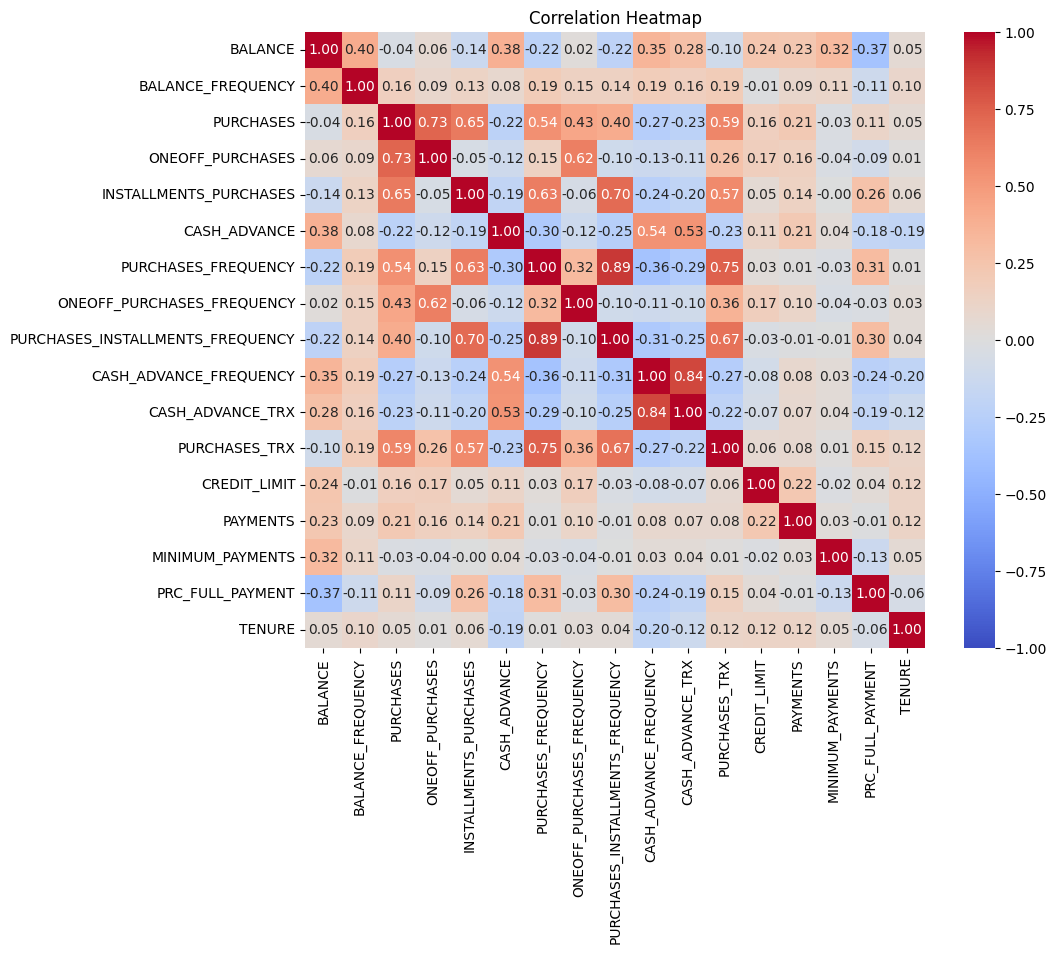

In [71]:
# @title  here  we can se correlation matrix and see that there are columns which are high correlated

corr = cleaned_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True,  # Show correlation values
            fmt=".2f",   # Format to 2 decimal places
            cmap='coolwarm',  # Color scheme
            center=0,    # Center color at 0
            vmin=-1,     # Minimum correlation value
            vmax=1)      # Maximum correlation value

plt.title('Correlation Heatmap')
plt.show()


In [72]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch, KMeans ,DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import defaultdict
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


def custom_grid_search(estimator, param_grid, X, preprocess_pipe, metrics):
    """
    Custom grid search implementation for clustering algorithms

    Args:
        estimator: Clustering estimator object
        param_grid: Dictionary of parameters to search
        X: Input data
        preprocess_pipe: Preprocessing pipeline
        metrics: Dictionary of metric functions to evaluate

    Returns:
        Dictionary containing all parameter combinations and their scores
    """
    results = defaultdict(list)

    # Generate all parameter combinations
    from itertools import product
    param_names = param_grid.keys()
    param_values = product(*param_grid.values())

    for values in param_values:
        params = dict(zip(param_names, values))

        # Create pipeline with current parameters
        pipe = Pipeline([
            ('preprocess', preprocess_pipe),
            ('cluster', estimator.set_params(**params))
        ])

        # Fit and predict
        labels = pipe.fit_predict(X)

        # Skip if only one cluster found
        if len(np.unique(labels)) < 2:
            continue

        # Calculate all metrics
        current_result = {'params': params}
        for metric_name, metric_func in metrics.items():
            try:
                score = metric_func(X, labels)
                current_result[metric_name] = score
            except:
                current_result[metric_name] = np.nan

        # Store results
        for k, v in current_result.items():
            results[k].append(v)

    return results



id_column = 'CUST_ID'
features = [col for col in cleaned_df.columns if col != id_column]

# ###Define preprocessing
# preprocess_pipe = Pipeline([
#     ('preprocessor', ColumnTransformer([
#         ('drop_id', 'drop', [id_column]),
#         ('num_pipeline', Pipeline([
#             ('scaler', StandardScaler())
#         ]), features)
#     ])),
#     ('pca', PCA(n_components=0.8))  # PCA after column transformation
# ])

preprocess_pipe = Pipeline([
    ('pca', PCA(n_components =0.8)),
    ('scaler', StandardScaler()),  # or RobustScaler()
])


In [78]:
# Define metrics to evaluate
metrics = {
    'silhouette': silhouette_score,
    'calinski_harabasz': calinski_harabasz_score,
    'davies_bouldin': davies_bouldin_score
}

# Define parameter grids
param_grids = {
    'BIRCH': {
        'cluster__threshold': [0.1, 0.3, 0.5],
        'cluster__branching_factor': [30, 50],
        'cluster__n_clusters': [3, 5, None]
    },
    'KMeans': {
        'cluster__n_clusters': [3, 5, 7],
        'cluster__init': ['k-means++', 'random'],
        'cluster__n_init': [10, 20]
    },
    'DBSCAN': {
        'cluster__eps': [0.3, 0.5, 0.7],
        'cluster__min_samples': [3, 5, 10]
    },
    'Agglomerative': {
        'cluster__n_clusters': [3, 5, 7],
        'cluster__linkage': ['ward', 'complete', 'average'],
        'cluster__metric': ['euclidean']
    }
}

# Dictionary to store all results
all_results = {}

for algo_name, params in param_grids.items():
    print(f"\n=== Running Custom Grid Search for {algo_name} ===")

    # Select the right estimator
    if algo_name == 'BIRCH':
        estimator = Birch()
    elif algo_name == 'KMeans':
        estimator = KMeans()
    elif algo_name == 'DBSCAN':
        estimator = DBSCAN()
    elif algo_name == 'Agglomerative':
        estimator = AgglomerativeClustering()


    # Adjust parameter names (remove 'cluster__' prefix)
    adjusted_params = {k.replace('cluster__', ''): v for k, v in params.items()}

    # Run custom grid search
    results = custom_grid_search(estimator, adjusted_params, cleaned_df, preprocess_pipe, metrics)
    # Store results
    all_results[algo_name] = results
    # Print best parameters for each metric
    for metric in metrics.keys():
        if metric in results:
            best_idx = np.nanargmax(results[metric]) if metric != 'davies_bouldin' else np.nanargmin(results[metric])
            print(f"Best {metric}: {results['params'][best_idx]} with score {results[metric][best_idx]:.3f}")

# Access full results
print("\n=== Full Results ===")
print(all_results)


=== Running Custom Grid Search for BIRCH ===
Best silhouette: {'threshold': 0.5, 'branching_factor': 30, 'n_clusters': 3} with score 0.689
Best calinski_harabasz: {'threshold': 0.1, 'branching_factor': 30, 'n_clusters': 3} with score 3162.380
Best davies_bouldin: {'threshold': 0.5, 'branching_factor': 30, 'n_clusters': 3} with score 0.508

=== Running Custom Grid Search for KMeans ===
Best silhouette: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10} with score 0.508
Best calinski_harabasz: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 20} with score 3377.091
Best davies_bouldin: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10} with score 0.804

=== Running Custom Grid Search for DBSCAN ===
Best silhouette: {'eps': 0.7, 'min_samples': 5} with score 0.624
Best calinski_harabasz: {'eps': 0.7, 'min_samples': 10} with score 397.872
Best davies_bouldin: {'eps': 0.5, 'min_samples': 5} with score 1.330

=== Running Custom Grid Search for Agglomerative ===
Best silhouette: {'n_clust

In [80]:
# @title Since Best model is Birch with parameters 'threshold': 0.5, 'branching_factor': 30, 'n_clusters': 3
final_model = Birch(threshold=0.5, branching_factor=30, n_clusters=3)
final_model.fit(cleaned_df)

Birch(branching_factor=30)

In [75]:


# # Preprocessing pipeline (scaling + dimensionality reduction)
# preprocess_pipe = Pipeline([
#     ('pca', PCA(n_components=0.80)),
#     ('scaler', StandardScaler()),
# ])

# def create_clustering_pipeline(estimator):
#     return Pipeline([
#         ('preprocess', preprocess_pipe),
#         ('cluster', estimator)
#     ])

# # Parameter grids for all algorithms
# param_grids = {
#     'BIRCH': {
#         'cluster__threshold': [0.1, 0.3, 0.5],
#         'cluster__branching_factor': [30, 50],
#         'cluster__n_clusters': [3, 5, None]
#     },
#     'KMeans': {
#         'cluster__n_clusters': [3, 5, 7],
#         'cluster__init': ['k-means++', 'random'],
#         'cluster__n_init': [10, 20]
#     },
#     'DBSCAN': {
#         'cluster__eps': [0.3, 0.5, 0.7],
#         'cluster__min_samples': [3, 5, 10]
#     },
#     'Agglomerative': {
#         'cluster__n_clusters': [3, 5, 7],
#         'cluster__linkage': ['ward', 'complete', 'average'],
#         'cluster__affinity': ['euclidean', 'l1', 'l2', 'manhattan']
#     }
# }

# results = {}

# for algo_name, params in param_grids.items():
#     print(f"\n=== Evaluating {algo_name} ===")

#     # Select estimator
#     if algo_name == 'BIRCH':
#         estimator = Birch()
#     elif algo_name == 'KMeans':
#         estimator = KMeans()
#     elif algo_name == 'DBSCAN':
#         estimator = DBSCAN()
#     elif algo_name == 'Agglomerative':
#         estimator = AgglomerativeClustering()

#     # Create and fit pipeline
#     pipe = create_clustering_pipeline(estimator)
#     pipe.fit(cleaned_df)

#     # Get transformed data and labels
#     X_trans = pipe.named_steps['preprocess'].transform(cleaned_df)
#     labels = pipe.named_steps['cluster'].labels_

#     # Calculate metrics (handle cases with too few clusters)
#     n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

#     if n_clusters < 2:
#         print(f"Warning: Only {n_clusters} cluster(s) found for {algo_name}")
#         scores = {
#             'silhouette': np.nan,
#             'calinski_harabasz': np.nan,
#             'davies_bouldin': np.nan,
#             'n_clusters': n_clusters
#         }
#     else:
#         scores = {
#             'silhouette': silhouette_score(X_trans, labels),
#             'calinski_harabasz': calinski_harabasz_score(X_trans, labels),
#             'davies_bouldin': davies_bouldin_score(X_trans, labels),
#             'n_clusters': n_clusters
#         }

#     results[algo_name] = scores
#     print(f"Scores: {scores}")

# # Convert results to DataFrame for better visualization
# import pandas as pd
# results_df = pd.DataFrame(results).T
# print("\n=== Final Results ===")
# print(results_df)


=== Evaluating BIRCH ===
Scores: {'silhouette': np.float64(0.7688896107378479), 'calinski_harabasz': np.float64(1118.1833253665316), 'davies_bouldin': np.float64(0.4328735731664421), 'n_clusters': 3}

=== Evaluating KMeans ===
Scores: {'silhouette': np.float64(0.38545882618354393), 'calinski_harabasz': np.float64(3737.9996355438398), 'davies_bouldin': np.float64(0.8145479630556791), 'n_clusters': 8}

=== Evaluating DBSCAN ===
Scores: {'silhouette': np.float64(0.6326799654273713), 'calinski_harabasz': np.float64(332.11046342810937), 'davies_bouldin': np.float64(1.4492939609876965), 'n_clusters': 4}

=== Evaluating Agglomerative ===
Scores: {'silhouette': np.float64(0.796453547050975), 'calinski_harabasz': np.float64(1859.6513863921994), 'davies_bouldin': np.float64(0.5405743426260714), 'n_clusters': 2}

=== Final Results ===
               silhouette  calinski_harabasz  davies_bouldin  n_clusters
BIRCH            0.768890        1118.183325        0.432874         3.0
KMeans           